In [13]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt
import re

In [15]:
# strace openat 라인에서 경로 찾기
regex = re.compile(r'openat\(AT_FDCWD, "(/[^"]+)",')

In [16]:
# strace -e openat -o output.log <command>
with open("../data/GIMP/strace-gimp-filtered.log", "r", encoding="utf-8") as f:
    lines = f.readlines()
    
    # 파일 경로 추출
    path_list = []
    for line in lines:
        match = regex.search(line)
        if match:
            path = match.group(1)
            path_list.append(path)

    # 각 파일 경로 인덱싱
    path_index = {}
    counter = 0
    for line in path_list:
        if line not in path_index:
            path_index[line] = counter
            counter += 1

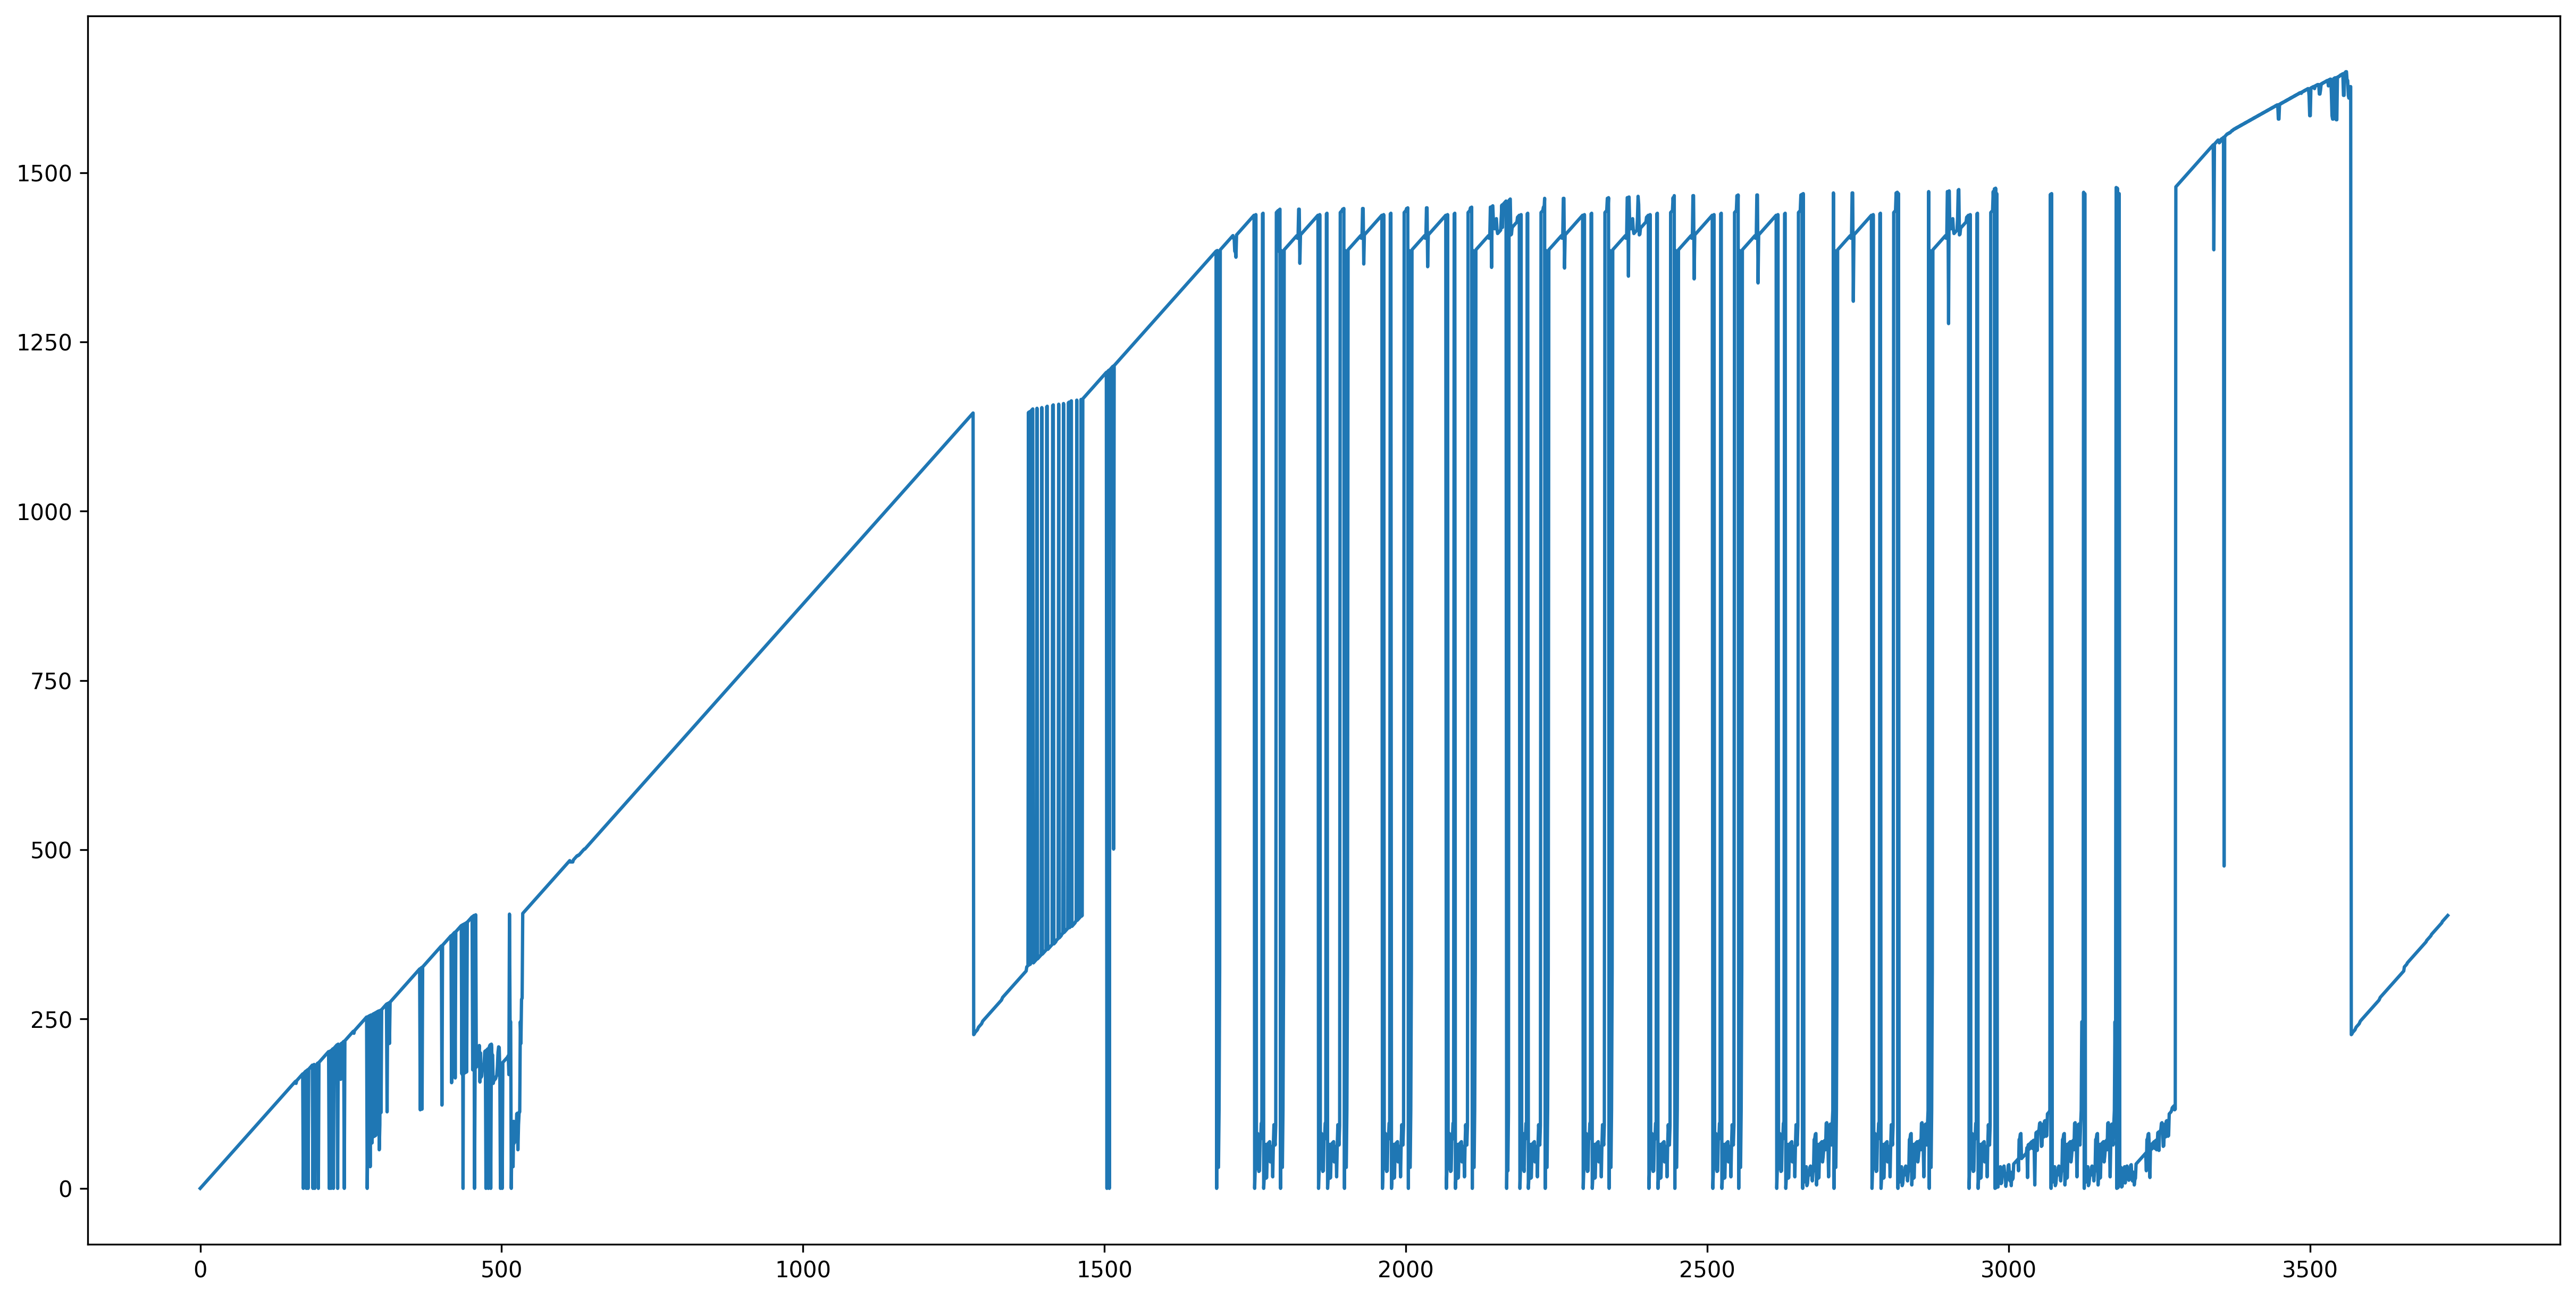

In [17]:
# visualize
plt.figure(figsize=(20, 10), dpi=300)
plt.plot(list(map(lambda x: path_index[x], path_list)))
plt.show()